Here we are importing the libraries

# Install pyclustering

In [1]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 15.3 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=7bb7ba8d83f624b0c217f635802fc5ae50ba57dc707f679aefba73aac5815e75
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [2]:
 from pyclustering.cluster.clarans import clarans
 # for recording execution time
 from pyclustering.utils import timedcall
 from sklearn import datasets
 # Class for plotting multi-dimensional data
 from pyclustering.cluster import cluster_visualizer_multidim 
 from sklearn.datasets import load_wine

## Loading dataset

In [3]:
 dataset =  datasets.load_wine()

***Viewing the Dataset Details***

In [4]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
len (dataset.feature_names)

13

In [6]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

***Converting the Dataset to List***

In [7]:
wine_data = dataset.data.tolist()

***Call the Instance of Clarans Class***

In [8]:
clarans_instance = clarans(wine_data, number_clusters = 2, numlocal = 3, maxneighbor = 5)

*process() method analyzes the clusters as per the CLARANS algorithm. We call the process() method and encapsulate it in the call to timedcall() function so that the time taken for executing process() method also gets recorded.*

In [9]:
 #timedcall() returns a tuple containing the execution time and result of executing the function
 (execution_time, res) = timedcall(clarans_instance.process);

In [10]:
#Print the execution time
print("Execution time : ", execution_time, "\n"); 

Execution time :  20.519336027 



***Get the clusters allocated by the algorithm***

In [11]:
clusters = clarans_instance.get_clusters()
print("Data points in cluster 1:\n",clusters[0])
print("Data points in cluster 2:\n",clusters[1])

Data points in cluster 1:
 [43, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 177]
Data points in cluster 2:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 68, 70, 73, 74, 78, 95, 141, 144, 145, 155, 157, 168, 173, 174, 175, 176]


***Get the list of medoids of the clusters allocated by the algorithm.***

In [12]:
med = clarans_instance.get_medoids()

In [13]:
print("\nLabel class of each point :\n ",dataset.target)


Label class of each point :
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [14]:
print("\nIndex of the best medoids : ",med) 


Index of the best medoids :  [76, 1]


Here, the input data has 13 features.
The cluster_visualizer_multidim class provides visualizations in multiple dimensions. 

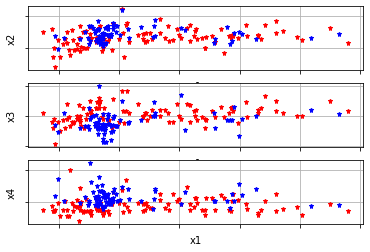

In [15]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters,wine_data,marker="*",markersize=5)
visualizer.show(pair_filter=[[1,2],[1,3],[1,4]],max_row_size=1)